In [1]:
import numpy as np
import matplotlib.pyplot as plt

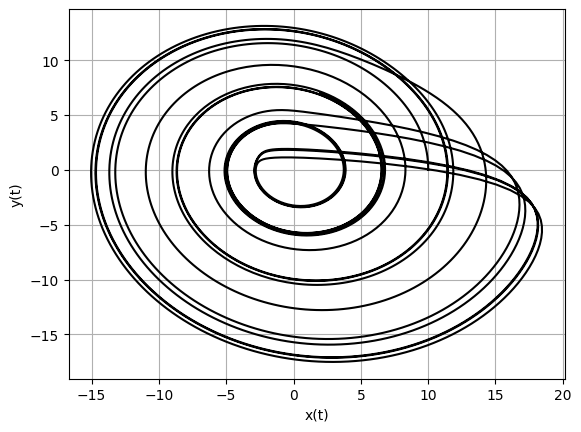

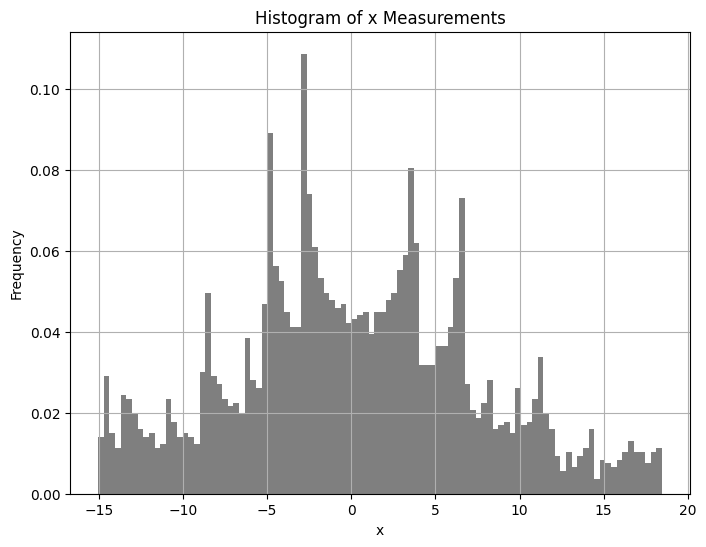

In [6]:
# solving the rossler system:

h = np.pi/100
t = np.arange(0, 100, h)
x = np.zeros(len(t))
y = np.zeros(len(t))
z = np.zeros(len(t))
x[0] = 10
y[0] = 0
z[0] = 0
a = 0.15
b = 0.2
c = 10

def RK4_Rossler(x, y, z, a, b, c, h):
    for i in range(0, len(x)-1):
        k1 = h* (- y[i] - z[i])
        k2 = h* (- y[i] - z[i])
        k3 = h* (- y[i] - z[i])
        k4 = h* (- y[i] - z[i])
        x[i+1] = x[i] + (k1 + 2*k2 + 2*k3 + k4)/6

        k1_ = h* (x[i] + a*y[i])
        k2_ = h* (x[i] + a*(y[i] + 0.5*k1_))
        k3_ = h* (x[i] + a*(y[i] + 0.5*k2_))
        k4_ = h* (x[i] + a*(y[i] + k3_))
        y[i+1] = y[i] + (k1_ + 2*k2_ + 2*k3_ + k4_)/6

        k1__ = h* (b + z[i] * (x[i] - c))
        k2__ = h* (b + (z[i] + 0.5*k1__) * (x[i] - c))
        k3__ = h* (b + (z[i] + 0.5*k2__) * (x[i] - c))
        k4__ = h* (b + (z[i] + k3__) * (x[i] - c))
        z[i+1] = z[i] + (k1__ + 2*k2__ + 2*k3__ + k4__)/6

    return x, y, z


xs,ys,zs = RK4_Rossler(x, y, z, a, b, c, h)
plt.plot(xs, ys, color = 'k')
plt.ylabel('y(t)')
plt.xlabel("x(t)")
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 6))
plt.hist(xs, bins=100, color='k', alpha=0.5, density = True)
plt.xlabel('x')
plt.ylabel('Frequency')
plt.title('Histogram of x Measurements')
plt.grid(True)
plt.show()


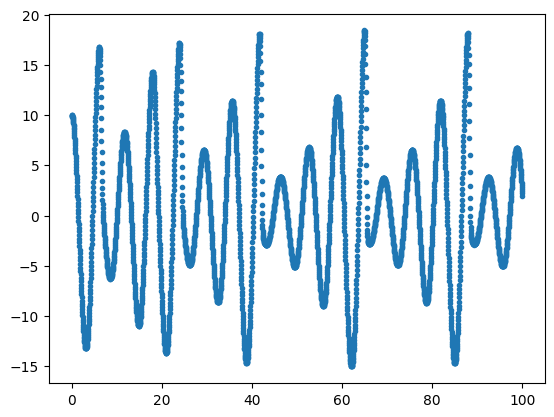

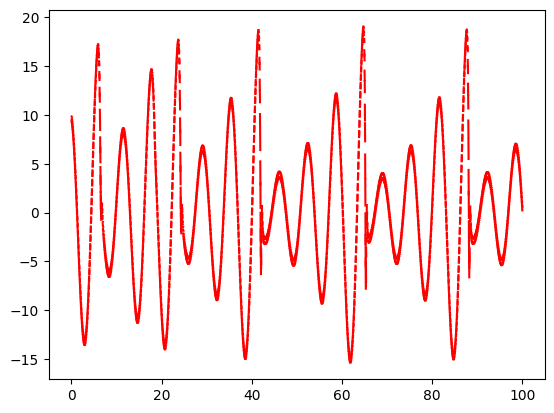

In [5]:
# Interpolating the x values: 

n = len(t) - 1
t_matrix = np.zeros((3*n, 3*n))
x_matrix = np.zeros((3*n - 1, 1)) 


for i in range(0, 2*n - 1, 2):
    row1 = []
    row2 = []
    for j in range(i - int(i/2)):
        row1.append(0)
        row1.append(0)
        row1.append(0)
        row2.append(0)
        row2.append(0)
        row2.append(0)
    row1.append(t[i-int(i/2)]**2)
    row1.append(t[i - int(i/2)])
    row1.append(1)
    row2.append(t[i-int(i/2) + 1 ]**2)
    row2.append(t[i-int(i/2) + 1])
    row2.append(1)
    if len(row1) < 3*n:
        for o in range(3*n - len(row1)):
            row1.append(0)
            row2.append(0)
    t_matrix[i] = row1
    t_matrix[i+1] = row2


for i in range(1, n):
    row = []
    for j in range(1, i):
        row.append(0)
        row.append(0)
        row.append(0)
    row.append(2*t[i])
    row.append(1)
    row.append(0)
    row.append(- 2* t[i])
    row.append(-1)
    if len(row) < 3*n:
        for o in range(3*n - len(row)):
            row.append(0)
    t_matrix[2*n - 1 + i] = row
    
x_matrix[0] = xs[0]
x_matrix[2*n - 1] = xs[len(xs) -1]

for i in range(1, 2*n -1, 2):
    x_matrix[i] = xs[i + 1 - int((i+1)/2)]
    x_matrix[i+1] = xs[i + 1 - int((i+1)/2)]


t_matrix = np.delete(t_matrix, obj = 0, axis = 1)
t_matrix = np.delete(t_matrix, obj = 3*n - 1, axis = 0)

unknown_matrix = np.linalg.solve(t_matrix, x_matrix)


i = np.linspace(t[0], t[1])
j = unknown_matrix[0]*i + unknown_matrix[1]
plt.plot(i,j)


plt.scatter(t,xs, marker = '.')
plt.show()


for i in range(1, n):
       o = np.linspace(t[i], t[i+1])
       l = unknown_matrix[3*i - 1] * o**2 + unknown_matrix[3*i] * o + unknown_matrix[3*i + 1]
       x_023 = l = unknown_matrix[3*i - 1] * (o+0.23)**2 + unknown_matrix[3*i] * (o+0.23) + unknown_matrix[3*i + 1]
       plt.plot(o,l, color = 'r')
plt.show()

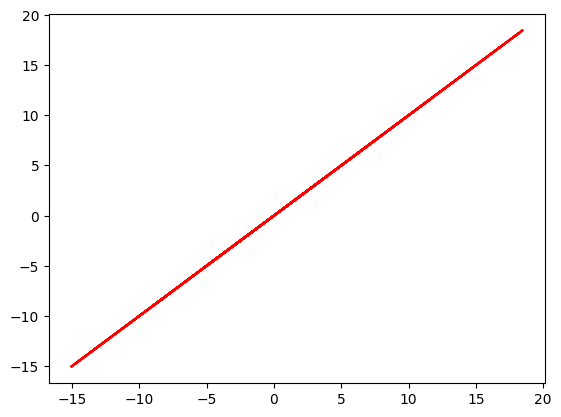

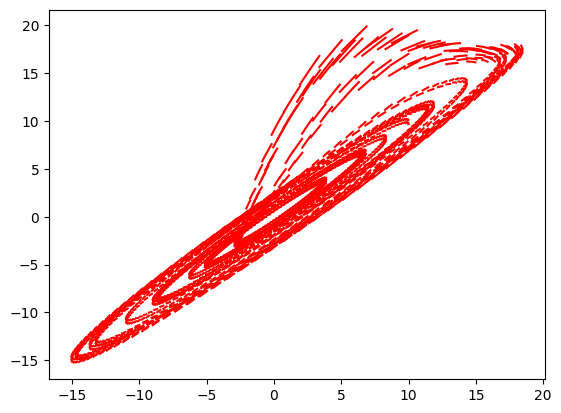

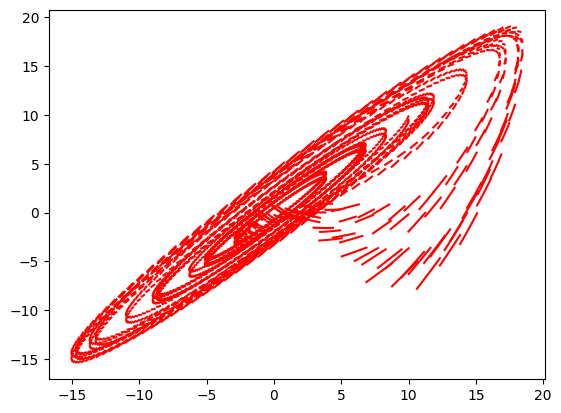

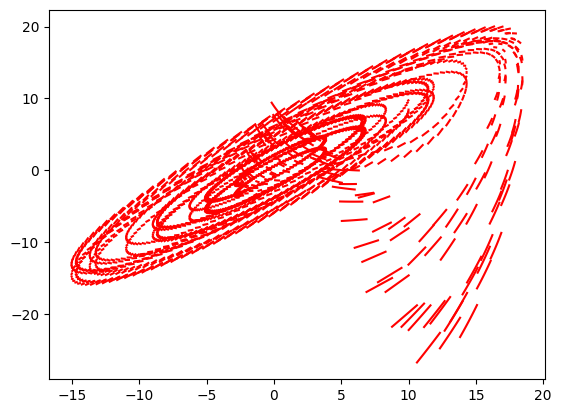

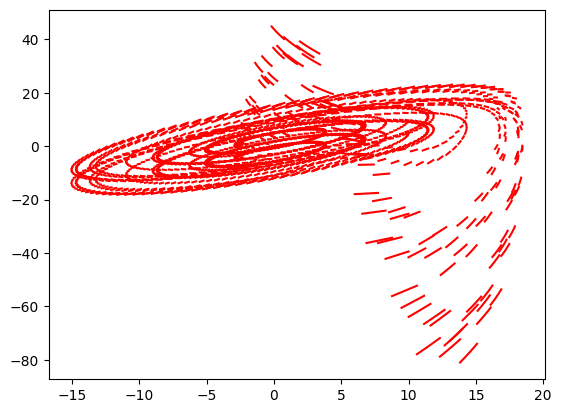

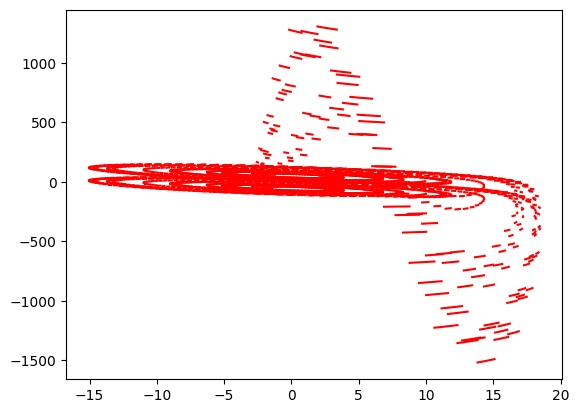

In [4]:
# trying for random T:

for i in range(1, n):
       o = np.linspace(t[i], t[i+1])
       l = unknown_matrix[3*i - 1] * o**2 + unknown_matrix[3*i] * o + unknown_matrix[3*i + 1]
       plt.plot(l, l, color = 'r')
plt.show()

for i in range(1, n):
       o = np.linspace(t[i], t[i+1])
       l = unknown_matrix[3*i - 1] * o**2 + unknown_matrix[3*i] * o + unknown_matrix[3*i + 1]
       x_018 = unknown_matrix[3*i - 1] * (o-0.18)**2 + unknown_matrix[3*i] * (o-0.18) + unknown_matrix[3*i + 1]
       plt.plot(l, x_018, color = 'r')
plt.show()

for i in range(1, n):
       o = np.linspace(t[i], t[i+1])
       l = unknown_matrix[3*i - 1] * o**2 + unknown_matrix[3*i] * o + unknown_matrix[3*i + 1]
       x_023 = unknown_matrix[3*i - 1] * (o+0.23)**2 + unknown_matrix[3*i] * (o+0.23) + unknown_matrix[3*i + 1]
       plt.plot(l, x_023, color = 'r')
plt.show()

for i in range(1, n):
       o = np.linspace(t[i], t[i+1])
       l = unknown_matrix[3*i - 1] * o**2 + unknown_matrix[3*i] * o + unknown_matrix[3*i + 1]
       x_039 = unknown_matrix[3*i - 1] * (o+0.39)**2 + unknown_matrix[3*i] * (o+0.39) + unknown_matrix[3*i + 1]
       plt.plot(l, x_039, color = 'r')
plt.show()

for i in range(1, n):
       o = np.linspace(t[i], t[i+1])
       l = unknown_matrix[3*i - 1] * o**2 + unknown_matrix[3*i] * o + unknown_matrix[3*i + 1]
       x_07 = unknown_matrix[3*i - 1] * (o+0.7)**2 + unknown_matrix[3*i] * (o+0.7) + unknown_matrix[3*i + 1]
       plt.plot(l, x_07, color = 'r')
plt.show()

for i in range(1, n):
       o = np.linspace(t[i], t[i+1])
       l = unknown_matrix[3*i - 1] * o**2 + unknown_matrix[3*i] * o + unknown_matrix[3*i + 1]
       x_326 = unknown_matrix[3*i - 1] * (o+3.26)**2 + unknown_matrix[3*i] * (o+3.26) + unknown_matrix[3*i + 1]
       plt.plot(l, x_326, color = 'r')
plt.show()

